### Ngân hàng A mở chiến dịch cấp phát thẻ tín dụng cho khách hàng mới. Để xác định tiêu chí của những khách hàng tiềm năng, họ đã thu thập thông tin về những khách hàng sử dụng thẻ tín dụng có sẵn. Thông tin bộ dữ liệu cung cấp bao gồm:<br>

SeriousDlqin2yrs: Khách hàng gặp khó khăn tài chính trong vòng 2 năm trở lại đây<br>
Age: Tuổi<br>
Total_money: Tổng số dư trong tài khoản – tổng các khoản vay<br>
NumberOfTime30-59DaysPastDueNotWorse: Số lần nợ thành toán thẻ từ 30-59 ngày.<br>
DebtRatio: Số tiền chi tiêu thẻ tín dụng/tổng thu nhập.<br>
MonthlyIncome: Thu nhập hàng tháng.<br>
NumberOfOpenCreditLinesAndLoans: Số lượng khoản vay Mở (trả góp như khoản vay mua ô tô hoặc thế chấp) và Dòng tín dụng (ví dụ: thẻ tín dụng).<br>
NumberOfTimes90DaysLate: Số lần người vay đã quá hạn 90 ngày trở lên.<br>
NumberRealEstateLoansOrLines: Số lượng các khoản vay thế chấp và bất động sản bao gồm hạn mức tín dụng sở hữu nhà.<br>
NumberOfTime60-89DaysPastDueNotWorse: Số lần người vay đã quá hạn 60-89 ngày nhưng không tệ hơn trong 2 năm qua.<br>
NumberOfDependents: Số người phụ thuộc trong gia đình không bao gồm bản thân<br>
### Yêu cầu<br>
1. Nêu thông tin về kiểu dữ liệu và khoảng dữ liệu ở các cột<br>
2. Kiểm tra dữ liệu khuyết thiếu<br>
3. Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu bằng giá trị nội suy theo các cột<br>
4. Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu bằng giá trị 0<br>
5. Vẽ biểu đồ boxplot, biểu đồ phân bố dữ liệu cho các cột<br>
6. Loại bỏ giá trị ngoại lai<br>
7. Chia dữ liệu ở các cột thành 4,5,6 nhóm có số lượng phần tử bằng nhau và đếm số lượng phần tử ở mỗi nhóm, lấy ra khoảng giữ liệu của mỗi nhóm.<br>
8. Chia dữ liệu ở các cột age và MonthlyIncome thành 5 nhóm theo các khoảng: 0, 30, 40, 50, 80, 150 và đếm số lượng phần tử ở mỗi nhóm.<br>
Đặt tên bất kỳ cho các nhóm ở 2 ý trên.<br>

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


In [134]:
df = pd.read_csv('Credit_Scoring.csv')
df.tail()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149987,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149988,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149989,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149990,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
149991,150000,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  int64  
 1   SeriousDlqin2yrs                      149992 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         120262 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 8   NumberOfTimes90DaysLate               149992 non-null  int64  
 9   NumberRealEstateLoansOrLines          149992 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 11  

Có 149992 dữ liệu đầu vào, cột MonthlyIncome và NumberOfDependents bị thiếu => 2 cột này chứa dữ liệu khuyết thiếu

In [136]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149992.000000,149992.000000,149992.000000,149992.000000,149992.000000,149992.000000,1.202620e+05,149992.000000,149992.000000,149992.000000,149992.000000,146068.000000
mean,75004.500000,0.066837,6.048729,52.295516,0.421029,352.985824,6.669872e+03,8.452877,0.265981,1.018221,0.240399,0.757236
std,43299.105125,0.249740,249.762028,14.771902,4.192890,2037.824499,1.438414e+04,5.146006,4.169414,1.129704,4.155290,1.115103
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37506.750000,0.000000,0.029863,41.000000,0.000000,0.175075,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75004.500000,0.000000,0.154162,52.000000,0.000000,0.366516,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112502.250000,0.000000,0.559012,63.000000,0.000000,0.868292,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


###### Phát hiện cột, dòng chứa dữ liệu khuyết thiếu

In [137]:
df.isnull().sum().sort_values(ascending=False)
# for i in df.columns[[6,11]]:
#     print(f'Số dữ liệu khuyết thiếu ở cột {i} là {df[i].isnull().sum()}')

MonthlyIncome                           29730
NumberOfDependents                       3924
Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
dtype: int64

###### Tiến hành xử lý dữ liệu khuyết thiếu


In [138]:
# Tiến hành loại bỏ dữ liệu khuyết thiếu, 
# số lượng bản ghi còn lại là bao nhiêu %
df1 = df.dropna()
percentage = 100* df1.shape[0]/df.shape[0]
print(f'Số lượng bản ghi còn lại là: {round(percentage,2)} %')

Số lượng bản ghi còn lại là: 80.18 %


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

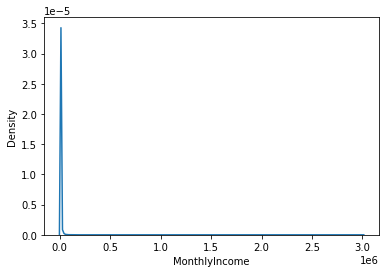

In [139]:
# Tiến hành thay thế dữ liệu khuyết thiếu bằng cách sử dụng các giá trị thay thế: 
# mode với các thuộc tính có giá trị rời rạc, median, nội suy với các biến có giá trị liên tục.

sns.kdeplot(data=df1['MonthlyIncome'])

In [140]:
df2 = df.interpolate(axis=1)
df2.shape

(149992, 12)

In [141]:
df2.isnull().sum().sort_values(ascending=False)


Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

### Tiến hành xử lý dữ liệu ngoại lai<br>
- Thực hiện các phương pháp phát hiện dữ liệu ngoại lai trên thuộc tính MonthlyIncome, so sánh phân bố của thuộc tính MonthlyIncome khi đã xóa bỏ dữ liệu ngoại lại<br>
- Thực hiện xóa bỏ tất cả các dòng dữ liệu nếu nó có bất kì 1 trong các giá trị thuộc tính thuộc định lượng nào thuộc vùng dữ liệu ngoại lai<br>
- Mô tả bộ dữ liệu bằng lệnh describe và nhận xét<br>


<AxesSubplot:xlabel='MonthlyIncome'>

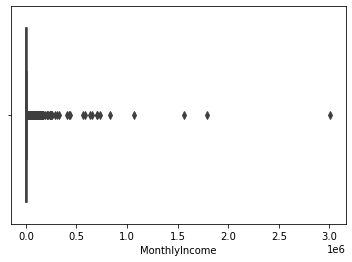

In [142]:
#1. Phát hiên dữ liệu ngoại lai bằng hình ảnh
sns.boxplot(x=df2['MonthlyIncome'])
#=> Có thể có dữ liệu ngoại lai vì có một số điểm khá cách xa ngoài rìa

<AxesSubplot:>

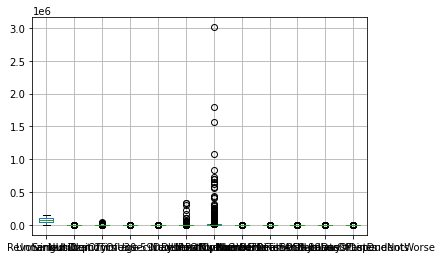

In [143]:
df2.boxplot()

In [144]:
#Phát hiện dữ liệu ngoại lai bằng IQR
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
IQR
#Xác định dữ liệu ngoại lai


Unnamed: 0                              74995.500000
SeriousDlqin2yrs                            0.000000
RevolvingUtilizationOfUnsecuredLines        0.529149
age                                        22.000000
NumberOfTime30-59DaysPastDueNotWorse        0.000000
DebtRatio                                   0.693217
MonthlyIncome                            5471.500000
NumberOfOpenCreditLinesAndLoans             6.000000
NumberOfTimes90DaysLate                     0.000000
NumberRealEstateLoansOrLines                2.000000
NumberOfTime60-89DaysPastDueNotWorse        0.000000
NumberOfDependents                          1.000000
dtype: float64

In [145]:
data = df2[~((df2< (Q1-1.5*IQR)) | (df2> (Q3+ 1.5*IQR))).any(axis=1)].copy()
data

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
2,11.0,0.0,0.644226,30.0,0.0,0.309476,2500.0,5.0,0.0,0.0,0.0,0.0
3,12.0,0.0,0.018798,51.0,0.0,0.531529,6501.0,7.0,0.0,2.0,0.0,2.0
4,13.0,0.0,0.010352,46.0,0.0,0.298354,12454.0,13.0,0.0,2.0,0.0,2.0
7,16.0,0.0,0.548458,64.0,0.0,0.209892,11362.0,7.0,0.0,1.0,0.0,2.0
9,18.0,0.0,0.166284,53.0,0.0,0.188274,8800.0,7.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149986,149995.0,0.0,0.385742,50.0,0.0,0.404293,3400.0,7.0,0.0,0.0,0.0,0.0
149987,149996.0,0.0,0.040674,74.0,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0
149988,149997.0,0.0,0.299745,44.0,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0
149990,149999.0,0.0,0.000000,30.0,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='MonthlyIncome'>

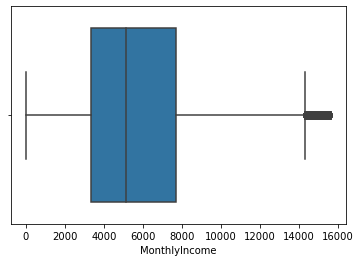

In [146]:
sns.boxplot(x=data['MonthlyIncome'])

<AxesSubplot:xlabel='NumberOfOpenCreditLinesAndLoans'>

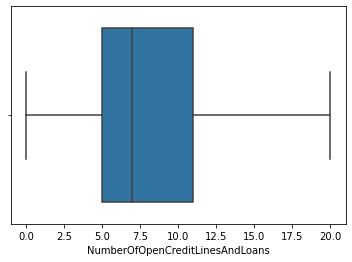

In [147]:
sns.boxplot(x=data['NumberOfOpenCreditLinesAndLoans'])

In [148]:
#Phát hiện dữ liệu ngoại lai bằng IQR
Q1 = data['MonthlyIncome'].quantile(0.25)
Q3 = data['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
IQR
#Xác định dữ liệu ngoại lai
df2

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9.0,0.0,0.116951,27.0,0.0,46.000000,24.0,2.0,0.0,0.0,0.0,0.0
1,10.0,0.0,0.189169,57.0,0.0,0.606291,23684.0,9.0,0.0,4.0,0.0,2.0
2,11.0,0.0,0.644226,30.0,0.0,0.309476,2500.0,5.0,0.0,0.0,0.0,0.0
3,12.0,0.0,0.018798,51.0,0.0,0.531529,6501.0,7.0,0.0,2.0,0.0,2.0
4,13.0,0.0,0.010352,46.0,0.0,0.298354,12454.0,13.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,149996.0,0.0,0.040674,74.0,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0
149988,149997.0,0.0,0.299745,44.0,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0
149989,149998.0,0.0,0.246044,58.0,0.0,3870.000000,1944.0,18.0,0.0,1.0,0.0,0.0
149990,149999.0,0.0,0.000000,30.0,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0


In [149]:
data['Outlier'] = (data['MonthlyIncome'] < (Q1-1.5*IQR)) | (data['MonthlyIncome']> (Q3+ 1.5*IQR))

data = data[data['Outlier'] == False].copy()
data

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Outlier
2,11.0,0.0,0.644226,30.0,0.0,0.309476,2500.0,5.0,0.0,0.0,0.0,0.0,False
3,12.0,0.0,0.018798,51.0,0.0,0.531529,6501.0,7.0,0.0,2.0,0.0,2.0,False
4,13.0,0.0,0.010352,46.0,0.0,0.298354,12454.0,13.0,0.0,2.0,0.0,2.0,False
7,16.0,0.0,0.548458,64.0,0.0,0.209892,11362.0,7.0,0.0,1.0,0.0,2.0,False
9,18.0,0.0,0.166284,53.0,0.0,0.188274,8800.0,7.0,0.0,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149986,149995.0,0.0,0.385742,50.0,0.0,0.404293,3400.0,7.0,0.0,0.0,0.0,0.0,False
149987,149996.0,0.0,0.040674,74.0,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0,False
149988,149997.0,0.0,0.299745,44.0,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0,False
149990,149999.0,0.0,0.000000,30.0,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0,False


In [150]:
data = data[data['MonthlyIncome']>0].copy()

<AxesSubplot:xlabel='MonthlyIncome'>

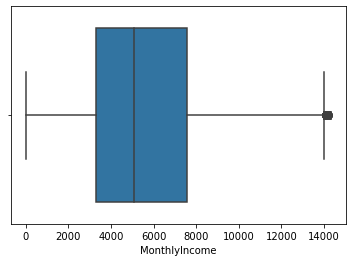

In [151]:
sns.boxplot(x=data['MonthlyIncome'])

In [152]:
# #Phát hiện dữ liệu ngoại lai bằng IQR
# Q1 = df2['NumberOfOpenCreditLinesAndLoans'].quantile(0.25)
# Q3 = df2['NumberOfOpenCreditLinesAndLoans'].quantile(0.75)
# IQR = Q3 - Q1
# IQR

In [153]:
data

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Outlier
2,11.0,0.0,0.644226,30.0,0.0,0.309476,2500.0,5.0,0.0,0.0,0.0,0.0,False
3,12.0,0.0,0.018798,51.0,0.0,0.531529,6501.0,7.0,0.0,2.0,0.0,2.0,False
4,13.0,0.0,0.010352,46.0,0.0,0.298354,12454.0,13.0,0.0,2.0,0.0,2.0,False
7,16.0,0.0,0.548458,64.0,0.0,0.209892,11362.0,7.0,0.0,1.0,0.0,2.0,False
9,18.0,0.0,0.166284,53.0,0.0,0.188274,8800.0,7.0,0.0,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149986,149995.0,0.0,0.385742,50.0,0.0,0.404293,3400.0,7.0,0.0,0.0,0.0,0.0,False
149987,149996.0,0.0,0.040674,74.0,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0,False
149988,149997.0,0.0,0.299745,44.0,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0,False
149990,149999.0,0.0,0.000000,30.0,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0,False


In [154]:
# df2['Outlier2'] = (df2['NumberOfOpenCreditLinesAndLoans'] < (Q1-1.5*IQR)) | (df2['NumberOfOpenCreditLinesAndLoans']> (Q3+ 1.5*IQR))

# df2 = df2[df2['Outlier2'] == False].copy()
# df2

In [155]:
# data = df2[~((df2< (Q1-1.5*IQR)) | (df2> (Q3+ 1.5*IQR))).any(axis=1)]
# data

In [156]:
# df2=df2.dropna()

In [157]:
# df2.shape

<AxesSubplot:>

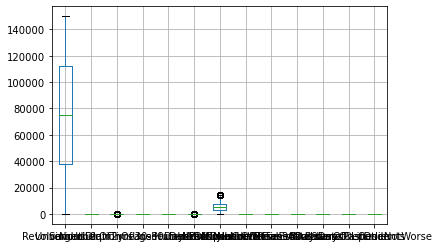

In [158]:
data.boxplot()

In [159]:
data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,75604.000000,75604.0,75604.000000,75604.000000,75604.0,75604.000000,75604.000000,75604.000000,75604.0,75604.000000,75604.0,75604.000000
mean,75090.730266,0.0,0.262473,52.935255,0.0,0.319625,5618.850398,8.054521,0.0,0.926075,0.0,0.516534
std,43262.246061,0.0,0.315386,15.407268,0.0,0.282483,3081.831490,4.272622,0.0,0.936963,0.0,0.742624
min,11.000000,0.0,0.000000,21.000000,0.0,0.000000,0.500000,0.000000,0.0,0.000000,0.0,0.000000
25%,37745.750000,0.0,0.022992,41.000000,0.0,0.112760,3309.000000,5.000000,0.0,0.000000,0.0,0.000000
50%,75242.000000,0.0,0.110683,53.000000,0.0,0.270266,5085.000000,7.000000,0.0,1.000000,0.0,0.000000
75%,112466.250000,0.0,0.414016,64.000000,0.0,0.445564,7583.000000,11.000000,0.0,2.000000,0.0,1.000000
max,150000.000000,0.0,1.341700,96.000000,0.0,1.908046,14296.000000,20.000000,0.0,5.000000,0.0,2.000000


In [160]:
data

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Outlier
2,11.0,0.0,0.644226,30.0,0.0,0.309476,2500.0,5.0,0.0,0.0,0.0,0.0,False
3,12.0,0.0,0.018798,51.0,0.0,0.531529,6501.0,7.0,0.0,2.0,0.0,2.0,False
4,13.0,0.0,0.010352,46.0,0.0,0.298354,12454.0,13.0,0.0,2.0,0.0,2.0,False
7,16.0,0.0,0.548458,64.0,0.0,0.209892,11362.0,7.0,0.0,1.0,0.0,2.0,False
9,18.0,0.0,0.166284,53.0,0.0,0.188274,8800.0,7.0,0.0,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149986,149995.0,0.0,0.385742,50.0,0.0,0.404293,3400.0,7.0,0.0,0.0,0.0,0.0,False
149987,149996.0,0.0,0.040674,74.0,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0,False
149988,149997.0,0.0,0.299745,44.0,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0,False
149990,149999.0,0.0,0.000000,30.0,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0,False


In [161]:
df2.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149992.000000,149992.000000,149992.000000,149992.000000,149992.000000,149992.000000,1.499920e+05,149992.000000,149992.000000,149992.000000,149992.000000,149992.000000
mean,75004.500000,0.066837,6.048729,52.295516,0.421029,352.985824,5.514377e+03,8.452877,0.265981,1.018221,0.240399,0.758674
std,43299.105125,0.249740,249.762028,14.771902,4.192890,2037.824499,1.312206e+04,5.146006,4.169414,1.129704,4.155290,1.783443
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37506.750000,0.000000,0.029863,41.000000,0.000000,0.175075,1.928500e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75004.500000,0.000000,0.154162,52.000000,0.000000,0.366516,4.393000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112502.250000,0.000000,0.559012,63.000000,0.000000,0.868292,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,98.000000


In [162]:
df2

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9.0,0.0,0.116951,27.0,0.0,46.000000,24.0,2.0,0.0,0.0,0.0,0.0
1,10.0,0.0,0.189169,57.0,0.0,0.606291,23684.0,9.0,0.0,4.0,0.0,2.0
2,11.0,0.0,0.644226,30.0,0.0,0.309476,2500.0,5.0,0.0,0.0,0.0,0.0
3,12.0,0.0,0.018798,51.0,0.0,0.531529,6501.0,7.0,0.0,2.0,0.0,2.0
4,13.0,0.0,0.010352,46.0,0.0,0.298354,12454.0,13.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,149996.0,0.0,0.040674,74.0,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0
149988,149997.0,0.0,0.299745,44.0,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0
149989,149998.0,0.0,0.246044,58.0,0.0,3870.000000,1944.0,18.0,0.0,1.0,0.0,0.0
149990,149999.0,0.0,0.000000,30.0,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0


### Thực hiện chuẩn hóa dữ liệu trên bộ đã làm sạch<br>
- Tiến hành chuẩn hóa theo các phương pháp đã được hướng dẫn trên thuộc tính: MonthlyIncome<br>
- So sánh phân bố của thuộc tính MonthlyIncome giữa các phương pháp chuẩn hóa sau<br>

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

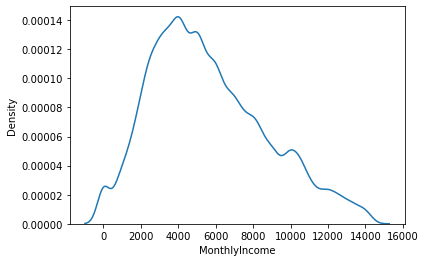

In [163]:
#Sơ đồ phân hóa của thuộc tính MonthlyIncome sau khi loại bỏ ngoại lai
sns.kdeplot(data=data['MonthlyIncome'])

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

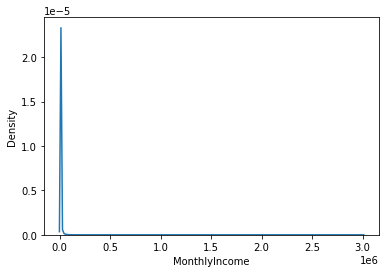

In [164]:
#Sơ đồ phân hóa của thuộc tính MonthlyIncome khi chưa loại bỏ ngoại lai
sns.kdeplot(data=df2['MonthlyIncome'])

<AxesSubplot:ylabel='Density'>

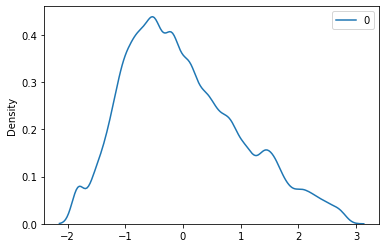

In [165]:
#chuẩn hóa theo Standar Scaler
scaler = StandardScaler()
df_s = scaler.fit_transform(pd.DataFrame(data['MonthlyIncome']))
sns.kdeplot(data=df_s)

<AxesSubplot:ylabel='Density'>

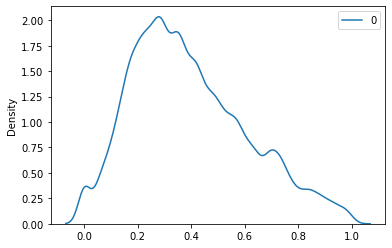

In [166]:
scaler = MinMaxScaler()
df_s = scaler.fit_transform(pd.DataFrame(data['MonthlyIncome']))
sns.kdeplot(data=df_s)

<AxesSubplot:ylabel='Density'>

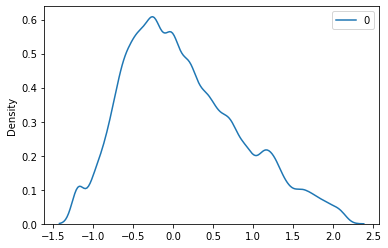

In [167]:
scaler = RobustScaler()
df_s = scaler.fit_transform(pd.DataFrame(data['MonthlyIncome']))
sns.kdeplot(data=df_s)

In [168]:
#Ta thấy ở 3 phương pháp chuẩn hóa, phân bố dữ liệu gần như được giữ nguyên, tuy nhiên khoáng giá trị giữ liệu đã thay đổi
#về nhỏ hơn rất nhiều so với ban đầu.


In [169]:
# scaler = RobustScaler()
# df_s = scaler.fit_transform(df2)
# sns.kdeplot(data=df_s)

#### Sử dụng các module mã hóa dữ liệu trong sklearn và pandas để mã hóa

7. Chia dữ liệu ở các cột thành 4,5,6 nhóm có số lượng phần tử bằng nhau và đếm số lượng phần tử ở mỗi nhóm, lấy ra khoảng giữ liệu của mỗi nhóm.<br>
8. Chia dữ liệu ở các cột age và MonthlyIncome thành 5 nhóm theo các khoảng: 0, 30, 40, 50, 80, 150 và đếm số lượng phần tử ở mỗi nhóm.<br>
Đặt tên bất kỳ cho các nhóm ở 2 ý trên.<br>

In [170]:
data_copy = data.copy()

In [171]:
d = list(data.columns)
d

['Unnamed: 0',
 'SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'Outlier']

In [172]:
data.drop(['Outlier','Unnamed: 0'], axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75604 entries, 2 to 149991
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      75604 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  75604 non-null  float64
 2   age                                   75604 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  75604 non-null  float64
 4   DebtRatio                             75604 non-null  float64
 5   MonthlyIncome                         75604 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       75604 non-null  float64
 7   NumberOfTimes90DaysLate               75604 non-null  float64
 8   NumberRealEstateLoansOrLines          75604 non-null  float64
 9   NumberOfTime60-89DaysPastDueNotWorse  75604 non-null  float64
 10  NumberOfDependents                    75604 non-null  float64
dtypes: float64(11)

In [173]:
# for i in data.columns:
#     data[i] = pd.cut(data[i], 4)
# data
    

In [174]:
data['MonthlyIncome'] = pd.cut(data['MonthlyIncome'], bins=[0.,30.,40.,50.,80.,150.])
data['MonthlyIncome'] 

2         NaN
3         NaN
4         NaN
7         NaN
9         NaN
         ... 
149986    NaN
149987    NaN
149988    NaN
149990    NaN
149991    NaN
Name: MonthlyIncome, Length: 75604, dtype: category
Categories (5, interval[float64, right]): [(0.0, 30.0] < (30.0, 40.0] < (40.0, 50.0] < (50.0, 80.0] < (80.0, 150.0]]

In [175]:
data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
2,0.0,0.644226,30.0,0.0,0.309476,NaN,5.0,0.0,0.0,0.0,0.0
3,0.0,0.018798,51.0,0.0,0.531529,NaN,7.0,0.0,2.0,0.0,2.0
4,0.0,0.010352,46.0,0.0,0.298354,NaN,13.0,0.0,2.0,0.0,2.0
7,0.0,0.548458,64.0,0.0,0.209892,NaN,7.0,0.0,1.0,0.0,2.0
9,0.0,0.166284,53.0,0.0,0.188274,NaN,7.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149986,0.0,0.385742,50.0,0.0,0.404293,NaN,7.0,0.0,0.0,0.0,0.0
149987,0.0,0.040674,74.0,0.0,0.225131,NaN,4.0,0.0,1.0,0.0,0.0
149988,0.0,0.299745,44.0,0.0,0.716562,NaN,4.0,0.0,1.0,0.0,2.0
149990,0.0,0.000000,30.0,0.0,0.000000,NaN,4.0,0.0,0.0,0.0,0.0


In [176]:
data_copy = pd.read_csv('Credit_Scoring.csv')
data_copy.tail()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149987,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149988,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149989,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149990,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
149991,150000,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


#### Có phải những khách hàng không có người phụ thuộc sẽ có thu nhập trung bình theo tháng (MonthlyIncome) nhỏ hơn những khách hàng có người phụ thuộc không (với mức ý nghĩa 10%)

Với mức ý nghĩa 10%:<br>
    - H0: Những khách hàng không có người phụ thuộc sẽ có thu nhập trung bình bằng những khách hàng có người phụ thuộc<br>
    - H1:  Những khách hàng không có người phụ thuộc sẽ có thu nhập trung bình nhỏ hơn những khách hàng có người phụ thuộc

In [43]:
from scipy import stats
import numpy as np

In [44]:
a = data_copy[data_copy['NumberOfDependents'] == 0]['MonthlyIncome']
b = data_copy[data_copy['NumberOfDependents'] != 0]['MonthlyIncome']
var_a = np.var(a)
var_b = np.var(b)
print(f'ration = {var_a/var_b if var_a>var_b else var_b/var_a}')

ration = 2.874512647868794


In [45]:
stats.ttest_ind(a,b, equal_var=True)

Ttest_indResult(statistic=nan, pvalue=nan)

pvalue<0.1 => Đủ điều kiện bác bỏ H0 <br>
statistic = -53.23 < -1.282 => Có thể kết luận những khách hàng không có người phụ thuộc sẽ có thu nhập trung bình nhỏ hơn những khách hàng có người phụ thuộc

In [46]:
a.count()

65452

In [47]:
b.count()

54810

#### Có phải trung bình số lượng khoản vay (NumberOfOpenCreditLinesAndLoans) những khách hàng gặp khó khăn trong vòng 2 năm trở lại đây (SeriousDlqin2yrs =1) thì sẽ cao hơn những khách hàng không gặp khó khăn không với mức ý nghĩa 10%

Với mức ý nghĩa 10% <br>
- H0: trung bình số lượng khoản vay (NumberOfOpenCreditLinesAndLoans) những khách hàng gặp khó khăn trong vòng 2 năm trở lại đây (SeriousDlqin2yrs =1) bằng những khách hàng không gặp khó khăn<br>
- H1: trung bình số lượng khoản vay (NumberOfOpenCreditLinesAndLoans) những khách hàng gặp khó khăn trong vòng 2 năm trở lại đây (SeriousDlqin2yrs =1) thì sẽ cao hơn những khách hàng không gặp khó khăn

In [48]:
a = data_copy[data_copy['SeriousDlqin2yrs'] == 1]['NumberOfOpenCreditLinesAndLoans']
b = data_copy[data_copy['SeriousDlqin2yrs'] == 0]['NumberOfOpenCreditLinesAndLoans']
var_a = np.var(a)
var_b = np.var(b)
print(f'ration = {var_a/var_b if var_a>var_b else var_b/var_a}')

ration = 1.226248381044129


In [49]:
data_copy['SeriousDlqin2yrs'].value_counts()

0    139967
1     10025
Name: SeriousDlqin2yrs, dtype: int64